In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv")
df.head()



,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Use the describe() method to get a summary of the numerical columns
summary = df.describe()

# Display the summary
print(summary)


         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


In [4]:
# Use the isnull() method to check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


C:\Users\omay1\AppData\Local\Temp\ipykernel_3664\3856586089.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


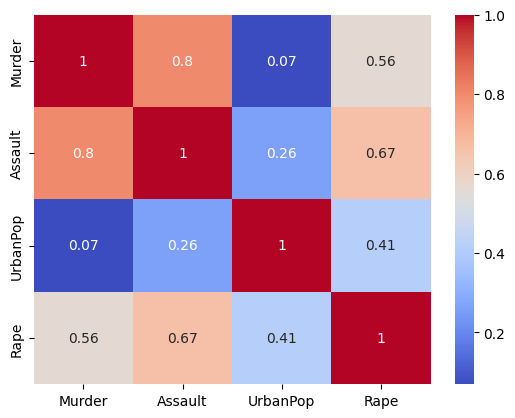

In [6]:
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [ ]:
'''
From the correlation plot we see here, we can see that Murder and Assault are the most closely correlated crimes,
and rape is the most commonly correlating crime within an urban population.

Assault and Rape also show to have a very high correlation.
'''

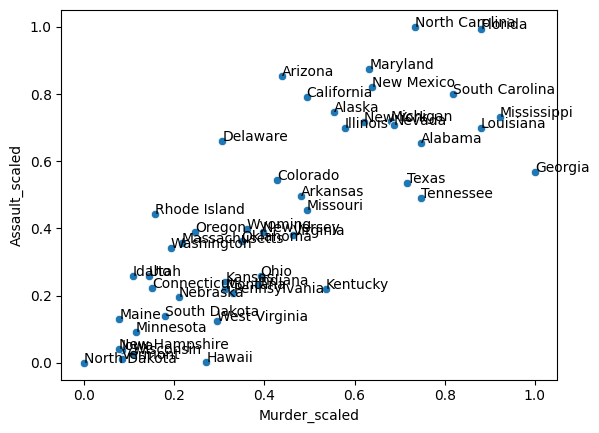

In [8]:
#Let's scale the rates of Murder and assault, and see how they vary from states.


# Scale the 'Murder' and 'Assault' columns
df['Murder_scaled'] = (df['Murder'] - df['Murder'].min()) / (df['Murder'].max() - df['Murder'].min())
df['Assault_scaled'] = (df['Assault'] - df['Assault'].min()) / (df['Assault'].max() - df['Assault'].min())

# Make a biplot of murder rates on the x-axis, assault on the y-axis
sns.scatterplot(x='Murder_scaled', y='Assault_scaled', data=df)

# Add the city label to each plot point
for i, txt in enumerate(df['City']):
    plt.annotate(txt, (df['Murder_scaled'][i], df['Assault_scaled'][i]))

# Show the plot
plt.show()


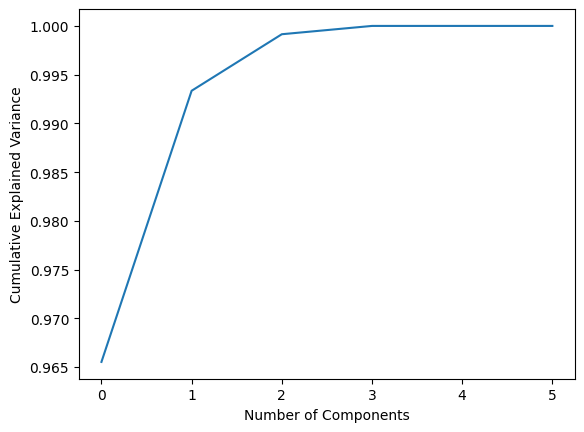

In [9]:
from sklearn.decomposition import PCA
# Convert the DataFrame to a NumPy array
data = df.iloc[:, 1:].values

# Perform PCA analysis
pca = PCA()
pca.fit(data)

# Plot the explained variance ratio for each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Show the plot
plt.show()


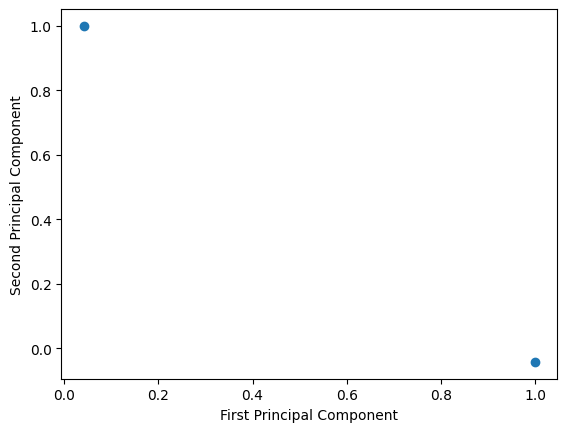

In [11]:
data = df[['Murder', 'Assault']].values

# Perform PCA analysis
pca = PCA()
pca.fit(data)

# Plot the first two principal components
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Show the plot
plt.show()


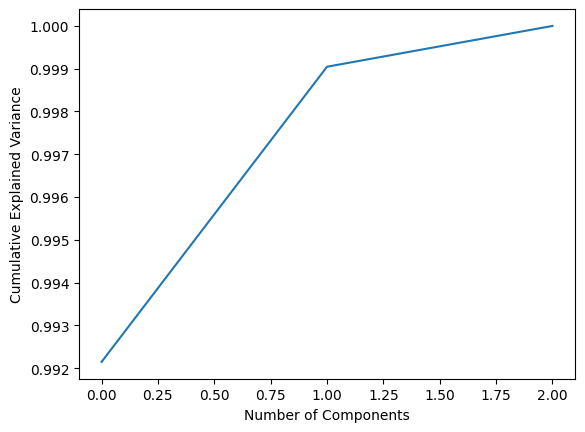

In [12]:
data = df[['Murder', 'Assault', 'Rape']].values

# Perform PCA analysis
pca = PCA()
pca.fit(data)

# Plot the explained variance ratio for each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Show the plot
plt.show()


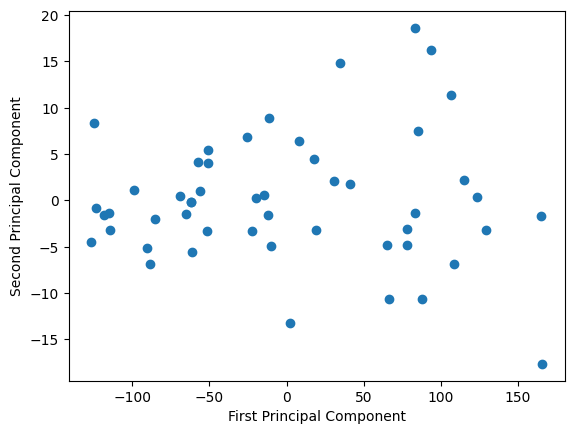

In [13]:
data = df[['Murder', 'Assault', 'Rape']].values

# Perform PCA analysis and reduce dimensionality to two components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Plot the first two principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Show the plot
plt.show()




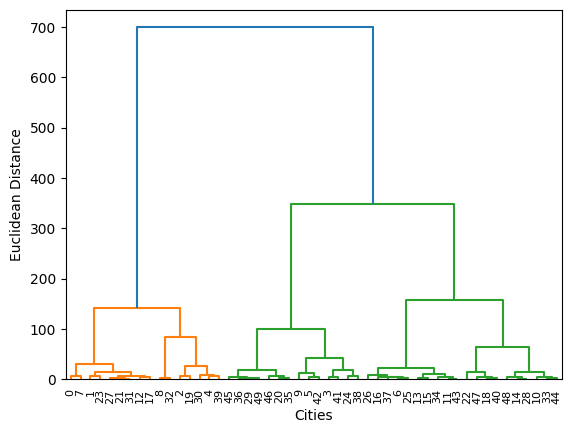

In [14]:
from scipy.cluster import hierarchy

data = df[['Murder', 'Assault']].values

# Compute the linkage matrix
Z = hierarchy.linkage(data, method='ward')

# Plot the dendrogram
hierarchy.dendrogram(Z)
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')

# Show the plot
plt.show()


C:\Users\omay1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


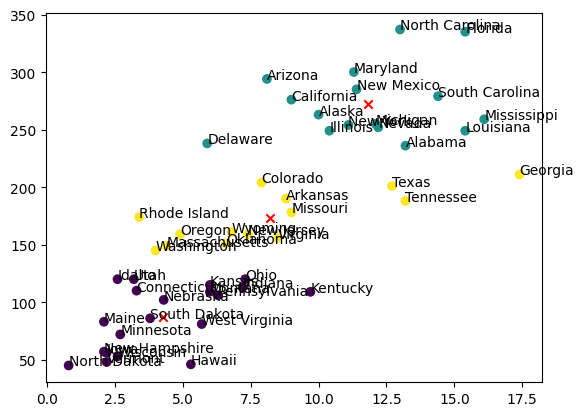

In [17]:
from sklearn.cluster import KMeans

data = df[['Murder', 'Assault']].values

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_

# Plot the data points with different colors for each cluster
plt.scatter(data[:, 0], data[:, 1], c=labels)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')

# Add labels for each city
for i, city in enumerate(df["City"]):
    plt.annotate(city, (data[i, 0], data[i, 1]))

# Show the plot
plt.show()




